<a href="https://colab.research.google.com/github/SisekoC/My-Notebooks/blob/main/py_algotrading_combo_ma_crossover_grid_search_take4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algorithmic Trading Model for Combo Moving Average Crossover Grid Search Take 4
### David Lowe
### August 13, 2020

NOTE: This script is for learning purposes only and does not constitute a recommendation for buying or selling any stock mentioned in this script.

SUMMARY: The purpose of this project is to construct and test an algorithmic trading model and document the end-to-end steps using a template.

INTRODUCTION: This algorithmic trading model examines a series of exponential and simple moving average (MA) crossover models via a grid search methodology. The previous Take1 and Take2 iterations of modeling focused on applying a trend-following or a momentum-oriented approach. This iteration of modeling will focus on applying a mean-reversion approach. When the fast moving-average curve crosses below the slow moving-average curve, the strategy goes long (buys) on the stock. When the opposite occurs, we will exit the position.

From iteration Take1, the grid search script searched through all combinations between the two sets of MA curves, simple and exponential. The faster MA curve ranged from 5 days to 30 days, while the slower MA ranged from 10 days to 60 days. Both curves used a 5-day increment.

From iteration Take2, the grid search script searched through all combinations between the four sets of MA curves. The four models were simple only, exponential only, fast simple/slow exponential, and fast exponential/slow simple. The fast MA curve ranged from 5 days to 30 days, while the slow MA ranged from 10 days to 60 days. All four sets of curves used a 5-day increment.

From iteration Take3, the grid search script searched through all combinations between the two sets of MA curves, simple and exponential. The faster MA curve ranged from 5 days to 30 days, while the slower MA ranged from 10 days to 60 days. Both curves used a 5-day increment.

For this Take4 iteration, the grid search script will search through all combinations between the four sets of MA curves. The four models are simple only, exponential only, fast simple/slow exponential, and fast exponential/slow simple. The fast MA curve can range from 5 days to 30 days, while the slow MA can range from 10 days to 60 days. All four sets of curves use a 5-day increment.

ANALYSIS: From iteration Take1, we analyzed the stock prices for Apple Inc. (AAPL) between January 1, 2019 and August 3, 2020. The best simple MA model with 10-day and 20-day produced a profit of 284.11 per share. The best exponential MA model with 5-day and 20-day produced a gain of 280.73. The long-only approach yielded a gain of 280.86 per share.

From iteration Take2, we analyzed the stock prices for Apple Inc. (AAPL) between January 1, 2019 and August 3, 2020. The best MA model with 5-day EMA and 30-day SMA produced a profit of 289.28 per share. The long-only approach yielded a profit of 280.86 per share.

From iteration Take3, we analyzed the stock prices for Apple Inc. (AAPL) between January 1, 2019 and August 3, 2020. The best simple MA model with 30-day and 60-day produced a profit of 97.39 per share. The long-only approach yielded a gain of 280.86 per share.

For this Take4 iteration, we analyzed the stock prices for Apple Inc. (AAPL) between January 1, 2019 and August 3, 2020. The best MA model with 30-day SMA and 35-day EMA produced a profit of 112.00 per share. The long-only approach yielded a profit of 280.86 per share.

CONCLUSION: For AAPL and during the modeling time frame, the mean-reversion approach produced a suboptimal return when compared to the momentum-oriented and long-only approaches. In this case, the buying-and-holding approach is much more profitable without too much fuss.

Dataset ML Model: Time series analysis with numerical attributes

Dataset Used: Quandl

An algorithmic trading modeling project generally can be broken down into about five major tasks:

1. Prepare Environment
2. Acquire and Pre-Process Data
3. Develop Strategy and Train Model
4. Back-test Model
5. Evaluate Performance

## Task 1. Prepare Environment

In [ ]:
pip install python-dotenv

In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from dotenv import load_dotenv

In [ ]:
stock_symbol = 'AAPL'
initial_capital = 10000

# Specify the moving average parameters for the trading strategy
fast_ema_min = 5
fast_ema_max = 30
slow_ema_min = 10
slow_ema_max = 60
fast_sma_min = 5
fast_sma_max = 30
slow_sma_min = 10
slow_sma_max = 60
ma_increment = 5
min_ma_gap = 5

# The number of extra days of data we need (usually equals to the larger of slow_ema or slow_sma)
extra_days_data = slow_sma_max

model_start_date = datetime(2015, 1, 1)
print("Starting date for the model:", model_start_date)
stock_start_date = model_start_date - timedelta(days=int(extra_days_data*1.5)) # Need more pricing data to calculate moving averages

model_end_date = datetime.now()
model_end_date = datetime(2020, 8, 3)
print("Ending date for the model:", model_end_date)

Starting date for the model: 2015-01-01 00:00:00
Ending date for the model: 2020-08-03 00:00:00


In [ ]:
# Begin the timer for the script processing
startTimeScript = datetime.now()

# Set up the verbose flag to print detailed messages for debugging (setting True will activate!)
verbose_models = True
verbose_graphs = True
verbose_portfolios = True

# Set up the sendNotification flag to send progress emails (setting True will send emails!)
notifyStatus = True

# Set up the parent directory location for loading the dotenv files
useColab = True
if useColab:
    # Mount Google Drive locally for storing files
    from google.colab import drive
    drive.mount('/content/gdrive')
    gdrivePrefix = '/content/gdrive/My Drive/Colab_Downloads/'
    env_path = '/content/gdrive/My Drive/Colab Notebooks/'
    dotenv_path = env_path + "python_script.env"
    load_dotenv(dotenv_path=dotenv_path)

# Set up the dotenv file for retrieving environment variables
useLocalPC = False
if useLocalPC:
    env_path = "/Users/david/PycharmProjects/"
    dotenv_path = env_path + "python_script.env"
    load_dotenv(dotenv_path=dotenv_path)

# Configure the plotting style
plt.style.use('seaborn')

# Set Pandas options
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 140)

Mounted at /content/gdrive


<ipython-input-4-f40fc0c96f94>:31: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## Task 2. Acquire and Pre-Process Data

In [ ]:
pip install quandl

In [ ]:
# Check and see whether the API key is available
import quandl
quandl.ApiConfig.api_key = 'AywUrfKTvTTsCiRfWoWp'
quandl_key = quandl.ApiConfig.api_key
if quandl_key is None: sys.exit("API key for Quandl not available. Script Processing Aborted!!!")

In [ ]:
start_date_string = stock_start_date.strftime('%Y-%m-%d')
end_date_string = model_end_date.strftime('%Y-%m-%d')

quandl_url = "https://www.quandl.com/api/v3/datatables/SHARADAR/SEP.json?date.gte=%s&date.lte=%s&ticker=%s&api_key=%s" % (start_date_string, end_date_string, stock_symbol, quandl_key)

In [ ]:
import requests
import pandas as pd

# Make the API call
response = requests.get(quandl_url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    quandl_dict = response.json()

    # Check if the expected keys are in the response
    if 'datatable' in quandl_dict and 'data' in quandl_dict['datatable']:
        # Convert to DataFrame
        stock_quandl = pd.DataFrame(quandl_dict['datatable']['data'])
        print(len(stock_quandl), 'data points retrieved from the API call.')
    else:
        print("Error: Unexpected response format.")
else:
    print(f"Error: Failed to retrieve data. Status code: {response.status_code}")

82 data points retrieved from the API call.


In [ ]:
# Rename columns
stock_quandl.columns = ['ticker', 'date', 'open', 'high', 'low', 'close', 'volume', 'dividend', 'closeunadj', 'lastupdated']

# Set the index to the 'date' column and convert it to datetime
stock_quandl.set_index(pd.to_datetime(stock_quandl['date']), inplace=True)

# Sort the DataFrame by the index
stock_quandl.sort_index(ascending=True, inplace=True)

# Display DataFrame information
stock_quandl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 82 entries, 2018-09-04 to 2018-12-31
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ticker       82 non-null     object 
 1   date         82 non-null     object 
 2   open         82 non-null     float64
 3   high         82 non-null     float64
 4   low          82 non-null     float64
 5   close        82 non-null     float64
 6   volume       82 non-null     float64
 7   dividend     82 non-null     float64
 8   closeunadj   82 non-null     float64
 9   lastupdated  82 non-null     object 
dtypes: float64(7), object(3)
memory usage: 7.0+ KB


In [ ]:
stock_quandl.head()

,ticker,date,open,high,low,close,volume,dividend,closeunadj,lastupdated
date,,,,,,,,,,
2018-09-04,AAPL,2018-09-04,57.102,57.295,56.657,57.090,109560528.0,54.397,228.36,2024-08-12
2018-09-05,AAPL,2018-09-05,57.248,57.417,56.275,56.718,133331840.0,54.042,226.87,2024-08-12
2018-09-06,AAPL,2018-09-06,56.557,56.837,55.325,55.775,137159904.0,53.144,223.10,2024-08-12
2018-09-07,AAPL,2018-09-07,55.462,56.343,55.178,55.325,150479240.0,52.715,221.30,2024-08-12
2018-09-10,AAPL,2018-09-10,55.237,55.462,54.117,54.583,158065812.0,52.007,218.33,2024-08-12


In [ ]:
stock_quandl.tail()

,ticker,date,open,high,low,close,volume,dividend,closeunadj,lastupdated
date,,,,,,,,,,
2018-12-24,AAPL,2018-12-24,37.038,37.888,36.648,36.708,148676928.0,35.098,146.83,2024-08-12
2018-12-26,AAPL,2018-12-26,37.075,39.307,36.680,39.292,234330176.0,37.570,157.17,2024-08-12
2018-12-27,AAPL,2018-12-27,38.960,39.193,37.517,39.038,212468260.0,37.326,156.15,2024-08-12
2018-12-28,AAPL,2018-12-28,39.375,39.630,38.638,39.057,169165696.0,37.345,156.23,2024-08-12
2018-12-31,AAPL,2018-12-31,39.633,39.840,39.120,39.435,140013864.0,37.706,157.74,2024-08-12


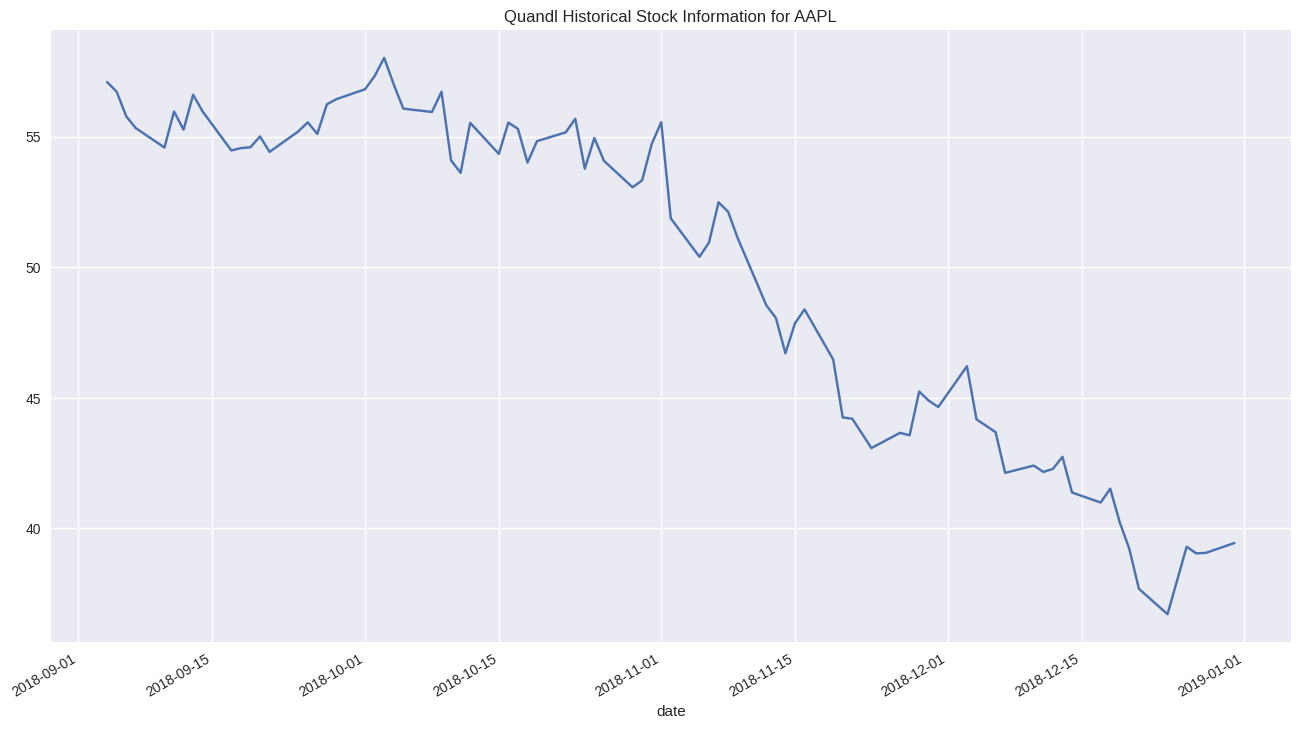

In [ ]:
quandl_title = 'Quandl Historical Stock Information for ' + stock_symbol
stock_quandl['close'].plot(figsize=(16,9), title=quandl_title)
plt.show()

## Task 3. Develop Strategy and Train Model

### 3.a) Set up the Dataframe for the Trading Model

In [ ]:
import pandas as pd

# Assuming stock_quandl is already defined and contains 'open' and 'close' columns
model_template = stock_quandl.loc[:, ['open', 'close']]

# Rename columns
model_template.rename(columns={'open': 'open_price', 'close': 'close_price'}, inplace=True)

# Display DataFrame information
model_template.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 82 entries, 2018-09-04 to 2018-12-31
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   open_price   82 non-null     float64
 1   close_price  82 non-null     float64
dtypes: float64(2)
memory usage: 1.9 KB


### 3.b) Set up the Analysis Table with Indicators

In [ ]:
import numpy as np
import pandas as pd

def populate_indicators(passed_model, fast_ma, slow_ma):
    passed_model['fast_ema'] = passed_model['close_price'].ewm(span=fast_ma).mean()
    passed_model['slow_ema'] = passed_model['close_price'].ewm(span=slow_ma).mean()
    passed_model['fast_sma'] = passed_model['close_price'].rolling(window=fast_ma).mean()
    passed_model['slow_sma'] = passed_model['close_price'].rolling(window=slow_ma).mean()
    passed_model['ema_change'] = passed_model['fast_ema'] - passed_model['slow_ema']
    passed_model['sma_change'] = passed_model['fast_sma'] - passed_model['slow_sma']
    passed_model['fastema_slowsma_chg'] = passed_model['fast_ema'] - passed_model['slow_sma']
    passed_model['fastsma_slowema_chg'] = passed_model['fast_sma'] - passed_model['slow_ema']
    passed_model['trade_signal'] = np.zeros(len(passed_model))
    passed_model['signal_change'] = np.zeros(len(passed_model))
    passed_model['entry_exit'] = np.zeros(len(passed_model))

    return passed_model

def populate_signals(model, change_curve):
    wait_for_entry = True
    for x in range(len(model)):
        if model[change_curve].iloc[x] > 0:
            model.at[x, 'trade_signal'] = 1  # Enter long position
        else:
            model.at[x, 'trade_signal'] = 0  # Exit long position

        if x != 0:
            model.at[x, 'signal_change'] = model['trade_signal'].iloc[x] - model['trade_signal'].iloc[x - 1]

            if wait_for_entry and model['signal_change'].iloc[x] == 1:
                model.at[x, 'entry_exit'] = model['signal_change'].iloc[x]
                wait_for_entry = False
            elif not wait_for_entry and model['signal_change'].iloc[x] != 0:
                model.at[x, 'entry_exit'] = model['signal_change'].iloc[x]

    return model


In [ ]:
# Processing models using only the EMA curves
ema_model_collection = {}
serial_number = 1

for slow_ma in range(slow_ema_min, slow_ema_max + 1, ma_increment):
    for fast_ma in range(fast_ema_min, fast_ema_max + 1, ma_increment):
        if (slow_ma - fast_ma) < min_ma_gap:
            break
        if verbose_models:
            print(f'Processing model with fast_ema of {fast_ma} and slow_ema of {slow_ma}')

        model_tag = f'EMA_{str(serial_number).zfill(3)}_FastEMA_{str(fast_ma).zfill(3)}_SlowEMA_{str(slow_ma).zfill(3)}'
        serial_number += 1

        trading_model = model_template.copy()
        populate_indicators(trading_model, fast_ma, slow_ma)
        trading_model = trading_model[model_start_date:model_end_date]
        populate_signals(trading_model, 'ema_change')

        ema_model_collection[model_tag] = trading_model.copy()

        if verbose_models:
            print(f'Model {model_tag} added to the trading model collection.')

print(f'{len(ema_model_collection)} EMA only models generated!')

# Processing models using only the SMA curves
print()
sma_model_collection = {}
serial_number = 1

for slow_ma in range(slow_sma_min, slow_sma_max + 1, ma_increment):
    for fast_ma in range(fast_sma_min, fast_sma_max + 1, ma_increment):
        if (slow_ma - fast_ma) < min_ma_gap:
            break
        if verbose_models:
            print(f'Processing model with fast_sma of {fast_ma} and slow_sma of {slow_ma}')

        model_tag = f'SMA_{str(serial_number).zfill(3)}_FastSMA_{str(fast_ma).zfill(3)}_SlowSMA_{str(slow_ma).zfill(3)}'
        serial_number += 1

        trading_model = model_template.copy()
        populate_indicators(trading_model, fast_ma, slow_ma)
        trading_model = trading_model[model_start_date:model_end_date]
        populate_signals(trading_model, 'sma_change')

        sma_model_collection[model_tag] = trading_model.copy()

        if verbose_models:
            print(f'Model {model_tag} added to the trading model collection.')

print(f'{len(sma_model_collection)} SMA only models generated!')

# Processing models using fast EMA and slow SMA curves
print()
fast_ema_slow_sma_models = {}
serial_number = 1

for slow_ma in range(slow_sma_min, slow_sma_max + 1, ma_increment):
    for fast_ma in range(fast_ema_min, fast_ema_max + 1, ma_increment):
        if (slow_ma - fast_ma) < min_ma_gap:
            break
        if verbose_models:
            print('Processing model with fast_ema of', fast_ma, 'and slow_sma of', slow_ma)

        model_tag = f'Mixed_{str(serial_number).zfill(3)}_FastEMA_{str(fast_ma).zfill(3)}_SlowSMA_{str(slow_ma).zfill(3)}'
        serial_number += 1

        trading_model = model_template.copy()
        populate_indicators(trading_model, fast_ma, slow_ma)
        trading_model = trading_model[model_start_date:model_end_date]
        populate_signals(trading_model, 'fastema_slowsma_chg')

        fast_ema_slow_sma_models[model_tag] = trading_model.copy()

        if verbose_models:
            print('Model', model_tag, 'added to the trading model collection.')

print(len(fast_ema_slow_sma_models), 'Fast EMA/Slow SMA models generated!')

# Processing models using fast SMA and slow EMA curves
print()
fast_sma_slow_ema_models = {}
serial_number = 1

for slow_ma in range(slow_ema_min, slow_ema_max + 1, ma_increment):
    for fast_ma in range(fast_sma_min, fast_sma_max + 1, ma_increment):
        if (slow_ma - fast_ma) < min_ma_gap:
            break
        if verbose_models:
            print('Processing model with fast_sma of', fast_ma, 'and slow_ema of', slow_ma)

        model_tag = f'Mixed_{str(serial_number).zfill(3)}_FastSMA_{str(fast_ma).zfill(3)}_SlowEMA_{str(slow_ma).zfill(3)}'
        serial_number += 1

        trading_model = model_template.copy()
        populate_indicators(trading_model, fast_ma, slow_ma)
        trading_model = trading_model[model_start_date:model_end_date]
        populate_signals(trading_model, 'fastsma_slowema_chg')

        fast_sma_slow_ema_models[model_tag] = trading_model.copy()

        if verbose_models:
            print('Model', model_tag, 'added to the trading model collection.')

print(len(fast_sma_slow_ema_models), 'Fast SMA/Slow EMA models generated!')


Processing model with fast_ema of 5 and slow_ema of 10
Model EMA_001_FastEMA_005_SlowEMA_010 added to the trading model collection.
Processing model with fast_ema of 5 and slow_ema of 15
Model EMA_002_FastEMA_005_SlowEMA_015 added to the trading model collection.
Processing model with fast_ema of 10 and slow_ema of 15
Model EMA_003_FastEMA_010_SlowEMA_015 added to the trading model collection.
Processing model with fast_ema of 5 and slow_ema of 20


<ipython-input-14-502542d7421f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model.at[x, 'trade_signal'] = 0  # Exit long position


Model EMA_004_FastEMA_005_SlowEMA_020 added to the trading model collection.
Processing model with fast_ema of 10 and slow_ema of 20
Model EMA_005_FastEMA_010_SlowEMA_020 added to the trading model collection.
Processing model with fast_ema of 15 and slow_ema of 20
Model EMA_006_FastEMA_015_SlowEMA_020 added to the trading model collection.
Processing model with fast_ema of 5 and slow_ema of 25
Model EMA_007_FastEMA_005_SlowEMA_025 added to the trading model collection.
Processing model with fast_ema of 10 and slow_ema of 25
Model EMA_008_FastEMA_010_SlowEMA_025 added to the trading model collection.
Processing model with fast_ema of 15 and slow_ema of 25
Model EMA_009_FastEMA_015_SlowEMA_025 added to the trading model collection.
Processing model with fast_ema of 20 and slow_ema of 25
Model EMA_010_FastEMA_020_SlowEMA_025 added to the trading model collection.
Processing model with fast_ema of 5 and slow_ema of 30
Model EMA_011_FastEMA_005_SlowEMA_030 added to the trading model collec

<ipython-input-14-502542d7421f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model.at[x, 'trade_signal'] = 0  # Exit long position


Model EMA_031_FastEMA_020_SlowEMA_045 added to the trading model collection.
Processing model with fast_ema of 25 and slow_ema of 45
Model EMA_032_FastEMA_025_SlowEMA_045 added to the trading model collection.
Processing model with fast_ema of 30 and slow_ema of 45
Model EMA_033_FastEMA_030_SlowEMA_045 added to the trading model collection.
Processing model with fast_ema of 5 and slow_ema of 50
Model EMA_034_FastEMA_005_SlowEMA_050 added to the trading model collection.
Processing model with fast_ema of 10 and slow_ema of 50
Model EMA_035_FastEMA_010_SlowEMA_050 added to the trading model collection.
Processing model with fast_ema of 15 and slow_ema of 50
Model EMA_036_FastEMA_015_SlowEMA_050 added to the trading model collection.
Processing model with fast_ema of 20 and slow_ema of 50
Model EMA_037_FastEMA_020_SlowEMA_050 added to the trading model collection.
Processing model with fast_ema of 25 and slow_ema of 50
Model EMA_038_FastEMA_025_SlowEMA_050 added to the trading model colle

<ipython-input-14-502542d7421f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model.at[x, 'trade_signal'] = 0  # Exit long position


Model EMA_043_FastEMA_020_SlowEMA_055 added to the trading model collection.
Processing model with fast_ema of 25 and slow_ema of 55
Model EMA_044_FastEMA_025_SlowEMA_055 added to the trading model collection.
Processing model with fast_ema of 30 and slow_ema of 55
Model EMA_045_FastEMA_030_SlowEMA_055 added to the trading model collection.
Processing model with fast_ema of 5 and slow_ema of 60
Model EMA_046_FastEMA_005_SlowEMA_060 added to the trading model collection.
Processing model with fast_ema of 10 and slow_ema of 60
Model EMA_047_FastEMA_010_SlowEMA_060 added to the trading model collection.
Processing model with fast_ema of 15 and slow_ema of 60
Model EMA_048_FastEMA_015_SlowEMA_060 added to the trading model collection.
Processing model with fast_ema of 20 and slow_ema of 60
Model EMA_049_FastEMA_020_SlowEMA_060 added to the trading model collection.
Processing model with fast_ema of 25 and slow_ema of 60
Model EMA_050_FastEMA_025_SlowEMA_060 added to the trading model colle

<ipython-input-14-502542d7421f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model.at[x, 'trade_signal'] = 0  # Exit long position


Model EMA_051_FastEMA_030_SlowEMA_060 added to the trading model collection.
51 EMA only models generated!

Processing model with fast_sma of 5 and slow_sma of 10
Model SMA_001_FastSMA_005_SlowSMA_010 added to the trading model collection.
Processing model with fast_sma of 5 and slow_sma of 15
Model SMA_002_FastSMA_005_SlowSMA_015 added to the trading model collection.
Processing model with fast_sma of 10 and slow_sma of 15
Model SMA_003_FastSMA_010_SlowSMA_015 added to the trading model collection.
Processing model with fast_sma of 5 and slow_sma of 20
Model SMA_004_FastSMA_005_SlowSMA_020 added to the trading model collection.
Processing model with fast_sma of 10 and slow_sma of 20
Model SMA_005_FastSMA_010_SlowSMA_020 added to the trading model collection.
Processing model with fast_sma of 15 and slow_sma of 20
Model SMA_006_FastSMA_015_SlowSMA_020 added to the trading model collection.
Processing model with fast_sma of 5 and slow_sma of 25
Model SMA_007_FastSMA_005_SlowSMA_025 adde

<ipython-input-14-502542d7421f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model.at[x, 'trade_signal'] = 0  # Exit long position


Model SMA_021_FastSMA_030_SlowSMA_035 added to the trading model collection.
Processing model with fast_sma of 5 and slow_sma of 40
Model SMA_022_FastSMA_005_SlowSMA_040 added to the trading model collection.
Processing model with fast_sma of 10 and slow_sma of 40
Model SMA_023_FastSMA_010_SlowSMA_040 added to the trading model collection.
Processing model with fast_sma of 15 and slow_sma of 40
Model SMA_024_FastSMA_015_SlowSMA_040 added to the trading model collection.
Processing model with fast_sma of 20 and slow_sma of 40
Model SMA_025_FastSMA_020_SlowSMA_040 added to the trading model collection.
Processing model with fast_sma of 25 and slow_sma of 40
Model SMA_026_FastSMA_025_SlowSMA_040 added to the trading model collection.
Processing model with fast_sma of 30 and slow_sma of 40
Model SMA_027_FastSMA_030_SlowSMA_040 added to the trading model collection.
Processing model with fast_sma of 5 and slow_sma of 45
Model SMA_028_FastSMA_005_SlowSMA_045 added to the trading model collec

<ipython-input-14-502542d7421f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model.at[x, 'trade_signal'] = 0  # Exit long position


Model Mixed_005_FastEMA_010_SlowSMA_020 added to the trading model collection.
Processing model with fast_ema of 15 and slow_sma of 20
Model Mixed_006_FastEMA_015_SlowSMA_020 added to the trading model collection.
Processing model with fast_ema of 5 and slow_sma of 25
Model Mixed_007_FastEMA_005_SlowSMA_025 added to the trading model collection.
Processing model with fast_ema of 10 and slow_sma of 25
Model Mixed_008_FastEMA_010_SlowSMA_025 added to the trading model collection.
Processing model with fast_ema of 15 and slow_sma of 25
Model Mixed_009_FastEMA_015_SlowSMA_025 added to the trading model collection.
Processing model with fast_ema of 20 and slow_sma of 25


<ipython-input-14-502542d7421f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model.at[x, 'trade_signal'] = 0  # Exit long position


Model Mixed_010_FastEMA_020_SlowSMA_025 added to the trading model collection.
Processing model with fast_ema of 5 and slow_sma of 30
Model Mixed_011_FastEMA_005_SlowSMA_030 added to the trading model collection.
Processing model with fast_ema of 10 and slow_sma of 30
Model Mixed_012_FastEMA_010_SlowSMA_030 added to the trading model collection.
Processing model with fast_ema of 15 and slow_sma of 30
Model Mixed_013_FastEMA_015_SlowSMA_030 added to the trading model collection.
Processing model with fast_ema of 20 and slow_sma of 30
Model Mixed_014_FastEMA_020_SlowSMA_030 added to the trading model collection.
Processing model with fast_ema of 25 and slow_sma of 30
Model Mixed_015_FastEMA_025_SlowSMA_030 added to the trading model collection.
Processing model with fast_ema of 5 and slow_sma of 35
Model Mixed_016_FastEMA_005_SlowSMA_035 added to the trading model collection.
Processing model with fast_ema of 10 and slow_sma of 35
Model Mixed_017_FastEMA_010_SlowSMA_035 added to the trad

<ipython-input-14-502542d7421f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model.at[x, 'trade_signal'] = 0  # Exit long position


Model Mixed_029_FastEMA_010_SlowSMA_045 added to the trading model collection.
Processing model with fast_ema of 15 and slow_sma of 45
Model Mixed_030_FastEMA_015_SlowSMA_045 added to the trading model collection.
Processing model with fast_ema of 20 and slow_sma of 45
Model Mixed_031_FastEMA_020_SlowSMA_045 added to the trading model collection.
Processing model with fast_ema of 25 and slow_sma of 45
Model Mixed_032_FastEMA_025_SlowSMA_045 added to the trading model collection.
Processing model with fast_ema of 30 and slow_sma of 45
Model Mixed_033_FastEMA_030_SlowSMA_045 added to the trading model collection.
Processing model with fast_ema of 5 and slow_sma of 50
Model Mixed_034_FastEMA_005_SlowSMA_050 added to the trading model collection.
Processing model with fast_ema of 10 and slow_sma of 50
Model Mixed_035_FastEMA_010_SlowSMA_050 added to the trading model collection.
Processing model with fast_ema of 15 and slow_sma of 50
Model Mixed_036_FastEMA_015_SlowSMA_050 added to the tra

<ipython-input-14-502542d7421f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model.at[x, 'trade_signal'] = 0  # Exit long position


Model Mixed_026_FastSMA_025_SlowEMA_040 added to the trading model collection.
Processing model with fast_sma of 30 and slow_ema of 40
Model Mixed_027_FastSMA_030_SlowEMA_040 added to the trading model collection.
Processing model with fast_sma of 5 and slow_ema of 45
Model Mixed_028_FastSMA_005_SlowEMA_045 added to the trading model collection.
Processing model with fast_sma of 10 and slow_ema of 45
Model Mixed_029_FastSMA_010_SlowEMA_045 added to the trading model collection.
Processing model with fast_sma of 15 and slow_ema of 45
Model Mixed_030_FastSMA_015_SlowEMA_045 added to the trading model collection.
Processing model with fast_sma of 20 and slow_ema of 45
Model Mixed_031_FastSMA_020_SlowEMA_045 added to the trading model collection.
Processing model with fast_sma of 25 and slow_ema of 45
Model Mixed_032_FastSMA_025_SlowEMA_045 added to the trading model collection.
Processing model with fast_sma of 30 and slow_ema of 45
Model Mixed_033_FastSMA_030_SlowEMA_045 added to the tra

<ipython-input-14-502542d7421f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model.at[x, 'trade_signal'] = 0  # Exit long position


Model Mixed_035_FastSMA_010_SlowEMA_050 added to the trading model collection.
Processing model with fast_sma of 15 and slow_ema of 50
Model Mixed_036_FastSMA_015_SlowEMA_050 added to the trading model collection.
Processing model with fast_sma of 20 and slow_ema of 50
Model Mixed_037_FastSMA_020_SlowEMA_050 added to the trading model collection.
Processing model with fast_sma of 25 and slow_ema of 50
Model Mixed_038_FastSMA_025_SlowEMA_050 added to the trading model collection.
Processing model with fast_sma of 30 and slow_ema of 50
Model Mixed_039_FastSMA_030_SlowEMA_050 added to the trading model collection.
Processing model with fast_sma of 5 and slow_ema of 55
Model Mixed_040_FastSMA_005_SlowEMA_055 added to the trading model collection.
Processing model with fast_sma of 10 and slow_ema of 55
Model Mixed_041_FastSMA_010_SlowEMA_055 added to the trading model collection.
Processing model with fast_sma of 15 and slow_ema of 55
Model Mixed_042_FastSMA_015_SlowEMA_055 added to the tra

<ipython-input-14-502542d7421f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model.at[x, 'trade_signal'] = 0  # Exit long position


Model Mixed_044_FastSMA_025_SlowEMA_055 added to the trading model collection.
Processing model with fast_sma of 30 and slow_ema of 55
Model Mixed_045_FastSMA_030_SlowEMA_055 added to the trading model collection.
Processing model with fast_sma of 5 and slow_ema of 60
Model Mixed_046_FastSMA_005_SlowEMA_060 added to the trading model collection.
Processing model with fast_sma of 10 and slow_ema of 60
Model Mixed_047_FastSMA_010_SlowEMA_060 added to the trading model collection.
Processing model with fast_sma of 15 and slow_ema of 60
Model Mixed_048_FastSMA_015_SlowEMA_060 added to the trading model collection.
Processing model with fast_sma of 20 and slow_ema of 60
Model Mixed_049_FastSMA_020_SlowEMA_060 added to the trading model collection.
Processing model with fast_sma of 25 and slow_ema of 60
Model Mixed_050_FastSMA_025_SlowEMA_060 added to the trading model collection.
Processing model with fast_sma of 30 and slow_ema of 60
Model Mixed_051_FastSMA_030_SlowEMA_060 added to the tra

In [ ]:
def list_model_entry_exit(model_collection):
    for model_name, model_data in model_collection.items():
        print(f'Listing the signal change and entry/exit points for {model_name}')

        # Check if the required columns are present
        if 'signal_change' in model_data.columns and 'entry_exit' in model_data.columns:
            # Filter the DataFrame for signal changes and entry/exit points
            entry_exit_points = model_data[(model_data['signal_change'] != 0) | (model_data['entry_exit'] != 0)]

            # Check if the filtered DataFrame is not empty
            if not entry_exit_points.empty:
                print(entry_exit_points[['signal_change', 'entry_exit']])
            else:
                print('No entry/exit points found.')
        else:
            print(f'Error: Required columns not found in {model_name}')

        print()

# Example usage
# list_model_entry_exit(ema_model_collection)

In [ ]:
if verbose_models: list_model_entry_exit(ema_model_collection)

Listing the signal change and entry/exit points for EMA_001_FastEMA_005_SlowEMA_010
      signal_change  entry_exit
date                           
0               NaN         NaN
1               0.0         NaN
2               0.0         NaN
3               0.0         NaN
4               0.0         NaN
5               0.0         NaN
6               0.0         NaN
7               0.0         NaN
8               0.0         NaN
9               0.0         NaN
10              0.0         NaN
11              0.0         NaN
12              0.0         NaN
13              0.0         NaN
14              0.0         NaN
15              0.0         NaN
16              0.0         NaN
17              0.0         NaN
18              0.0         NaN
19              0.0         NaN
20              0.0         NaN
21              0.0         NaN
22              0.0         NaN
23              0.0         NaN
24              0.0         NaN
25              0.0         NaN
26              0.0 

In [ ]:
if verbose_models: list_model_entry_exit(sma_model_collection)

Listing the signal change and entry/exit points for SMA_001_FastSMA_005_SlowSMA_010
      signal_change  entry_exit
date                           
0               NaN         NaN
1               0.0         NaN
2               0.0         NaN
3               0.0         NaN
4               0.0         NaN
5               0.0         NaN
6               0.0         NaN
7               0.0         NaN
8               0.0         NaN
9               0.0         NaN
10              0.0         NaN
11              0.0         NaN
12              0.0         NaN
13              0.0         NaN
14              0.0         NaN
15              0.0         NaN
16              0.0         NaN
17              0.0         NaN
18              0.0         NaN
19              0.0         NaN
20              0.0         NaN
21              0.0         NaN
22              0.0         NaN
23              0.0         NaN
24              0.0         NaN
25              0.0         NaN
26              0.0 

In [ ]:
if verbose_models: list_model_entry_exit(fast_ema_slow_sma_models)

Listing the signal change and entry/exit points for Mixed_001_FastEMA_005_SlowSMA_010
      signal_change  entry_exit
date                           
0               NaN         NaN
1               0.0         NaN
2               0.0         NaN
3               0.0         NaN
4               0.0         NaN
5               0.0         NaN
6               0.0         NaN
7               0.0         NaN
8               0.0         NaN
9               0.0         NaN
10              0.0         NaN
11              0.0         NaN
12              0.0         NaN
13              0.0         NaN
14              0.0         NaN
15              0.0         NaN
16              0.0         NaN
17              0.0         NaN
18              0.0         NaN
19              0.0         NaN
20              0.0         NaN
21              0.0         NaN
22              0.0         NaN
23              0.0         NaN
24              0.0         NaN
25              0.0         NaN
26              0.

In [ ]:
if verbose_models: list_model_entry_exit(fast_sma_slow_ema_models)

Listing the signal change and entry/exit points for Mixed_001_FastSMA_005_SlowEMA_010
      signal_change  entry_exit
date                           
0               NaN         NaN
1               0.0         NaN
2               0.0         NaN
3               0.0         NaN
4               0.0         NaN
5               0.0         NaN
6               0.0         NaN
7               0.0         NaN
8               0.0         NaN
9               0.0         NaN
10              0.0         NaN
11              0.0         NaN
12              0.0         NaN
13              0.0         NaN
14              0.0         NaN
15              0.0         NaN
16              0.0         NaN
17              0.0         NaN
18              0.0         NaN
19              0.0         NaN
20              0.0         NaN
21              0.0         NaN
22              0.0         NaN
23              0.0         NaN
24              0.0         NaN
25              0.0         NaN
26              0.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Plotting function
def draw_model_graphs(model_name, trade_model, stock_symbol, fast_ma_curve='fast_ema', slow_ma_curve='slow_ema'):
    graph_data = trade_model.copy()
    title_string = f"Moving Average Crossover Model for {model_name}"
    ylabel = f"{stock_symbol} price in $"

    fig, ax1 = plt.subplots(figsize=(16, 9))
    ax1.set_ylabel(ylabel)
    ax1.set_title(title_string)

    # Plot the moving averages and close price
    graph_data[fast_ma_curve].plot(ax=ax1, color='b', lw=2, label='Fast EMA')
    graph_data[slow_ma_curve].plot(ax=ax1, color='r', lw=2, label='Slow EMA')
    graph_data['close_price'].plot(ax=ax1, color='g', label='Close Price')

    # Plot buy and sell signals
    ax1.plot(graph_data.loc[graph_data.entry_exit == 1].index,
             graph_data.loc[graph_data.entry_exit == 1, 'close_price'],
             '^', markersize=7, color='k', label='Buy')
    ax1.plot(graph_data.loc[graph_data.entry_exit == -1].index,
             graph_data.loc[graph_data.entry_exit == -1, 'close_price'],
             'v', markersize=7, color='k', label='Sell')

    # Add legend and show plot
    ax1.legend(loc='upper left')
    plt.show()

# Example usage
# draw_model_graphs('Example Model', df, 'AAPL')

In [ ]:
if verbose_graphs:
    for tag in ema_model_collection:
        draw_model_graphs(tag, ema_model_collection[tag], stock_symbol, 'fast_ema', 'slow_ema')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Plotting function
def draw_model_graphs(model_name, trade_model, stock_symbol, fast_ma_curve='fast_sma', slow_ma_curve='slow_sma'):
    graph_data = trade_model.copy()
    title_string = f"Moving Average Crossover Model for {model_name}"
    ylabel = f"{stock_symbol} price in $"

    fig, ax1 = plt.subplots(figsize=(16, 9))
    ax1.set_ylabel(ylabel)
    ax1.set_title(title_string)

    # Plot the moving averages and close price
    graph_data[fast_ma_curve].plot(ax=ax1, color='b', lw=2, label='Fast SMA')
    graph_data[slow_ma_curve].plot(ax=ax1, color='r', lw=2, label='Slow SMA')
    graph_data['close_price'].plot(ax=ax1, color='g', label='Close Price')

    # Plot buy and sell signals
    ax1.plot(graph_data.loc[graph_data.entry_exit == 1].index,
             graph_data.loc[graph_data.entry_exit == 1, 'close_price'],
             '^', markersize=7, color='k', label='Buy')
    ax1.plot(graph_data.loc[graph_data.entry_exit == -1].index,
             graph_data.loc[graph_data.entry_exit == -1, 'close_price'],
             'v', markersize=7, color='k', label='Sell')

    # Add legend and show plot
    ax1.legend(loc='upper left')
    plt.show()

# Example usage
# draw_model_graphs('Example Model', df, 'AAPL')

In [ ]:
if verbose_graphs:
    for tag in fast_ema_slow_sma_models:
        draw_model_graphs(tag, fast_ema_slow_sma_models[tag], stock_symbol, 'fast_sma', 'slow_sma')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Plotting function
def draw_model_graphs(model_name, trade_model, stock_symbol, fast_ma_curve='fast_ema', slow_ma_curve='slow_sma'):
    graph_data = trade_model.copy()
    title_string = f"Moving Average Crossover Model for {model_name}"
    ylabel = f"{stock_symbol} price in $"

    fig, ax1 = plt.subplots(figsize=(16, 9))
    ax1.set_ylabel(ylabel)
    ax1.set_title(title_string)

    # Plot the moving averages and close price
    graph_data[fast_ma_curve].plot(ax=ax1, color='b', lw=2, label='Fast EMA')
    graph_data[slow_ma_curve].plot(ax=ax1, color='r', lw=2, label='Slow SMA')
    graph_data['close_price'].plot(ax=ax1, color='g', label='Close Price')

    # Plot buy and sell signals
    ax1.plot(graph_data.loc[graph_data.entry_exit == 1].index,
             graph_data.loc[graph_data.entry_exit == 1, 'close_price'],
             '^', markersize=7, color='k', label='Buy')
    ax1.plot(graph_data.loc[graph_data.entry_exit == -1].index,
             graph_data.loc[graph_data.entry_exit == -1, 'close_price'],
             'v', markersize=7, color='k', label='Sell')

    # Add legend and show plot
    ax1.legend(loc='upper left')
    plt.show()

# Example usage
# draw_model_graphs('Example Model', df, 'AAPL')

In [ ]:
if verbose_graphs:
    for tag in fast_ema_slow_sma_models:
        draw_model_graphs(tag, fast_ema_slow_sma_models[tag], stock_symbol, 'fast_ema', 'slow_sma')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Plotting function
def draw_model_graphs(model_name, trade_model, stock_symbol, fast_ma_curve='fast_sma', slow_ma_curve='slow_ema'):
    graph_data = trade_model.copy()
    title_string = f"Moving Average Crossover Model for {model_name}"
    ylabel = f"{stock_symbol} price in $"

    fig, ax1 = plt.subplots(figsize=(16, 9))
    ax1.set_ylabel(ylabel)
    ax1.set_title(title_string)

    # Plot the moving averages and close price
    graph_data[fast_ma_curve].plot(ax=ax1, color='b', lw=2, label='Fast SMA')
    graph_data[slow_ma_curve].plot(ax=ax1, color='r', lw=2, label='Slow EMA')
    graph_data['close_price'].plot(ax=ax1, color='g', label='Close Price')

    # Plot buy and sell signals
    ax1.plot(graph_data.loc[graph_data.entry_exit == 1].index,
             graph_data.loc[graph_data.entry_exit == 1, 'close_price'],
             '^', markersize=7, color='k', label='Buy')
    ax1.plot(graph_data.loc[graph_data.entry_exit == -1].index,
             graph_data.loc[graph_data.entry_exit == -1, 'close_price'],
             'v', markersize=7, color='k', label='Sell')

    # Add legend and show plot
    ax1.legend(loc='upper left')
    plt.show()

# Example usage
# draw_model_graphs('Example Model', df, 'AAPL')

In [ ]:
if verbose_graphs:
    for tag in fast_sma_slow_ema_models:
        draw_model_graphs(tag, fast_sma_slow_ema_models[tag], stock_symbol, 'fast_sma', 'slow_ema')

## Task 4. Back-test Model

In [ ]:
import pandas as pd

def trading_portfolio_generation(initial_capital, trade_model, verbose_portfolios=False):
    # Construct a portfolio to track the transactions and returns
    portfolio = pd.DataFrame(index=trade_model.index, columns=['trade_action', 'qty_onhand', 'cost_basis', 'sold_transaction', 'gain_loss', 'cash_onhand', 'position_value', 'total_position', 'accumu_return'])
    portfolio.iloc[0] = [0, 0, 0.00, 0.00, 0.00, initial_capital, 0.00, initial_capital, 0.00]
    recent_cost = 0

    # The conditional parameters below determine how the trading strategy will be carried out
    for i in range(1, len(portfolio)):
        if (trade_model.iloc[i]['entry_exit'] == 1) and (portfolio.iloc[i-1]['qty_onhand'] == 0):
            portfolio.iloc[i]['trade_action'] = 1
            portfolio.iloc[i]['qty_onhand'] = portfolio.iloc[i-1]['qty_onhand'] + portfolio.iloc[i]['trade_action']
            portfolio.iloc[i]['cost_basis'] = trade_model.iloc[i]['open_price'] * portfolio.iloc[i]['trade_action']
            portfolio.iloc[i]['sold_transaction'] = 0.00
            portfolio.iloc[i]['gain_loss'] = 0.00
            portfolio.iloc[i]['cash_onhand'] = portfolio.iloc[i-1]['cash_onhand'] - portfolio.iloc[i]['cost_basis']
            recent_cost = trade_model.iloc[i]['open_price'] * portfolio.iloc[i]['trade_action']
            if verbose_portfolios:
                print('BOUGHT QTY:', portfolio.iloc[i]['trade_action'], 'on', portfolio.index[i], 'at the price of', trade_model.iloc[i]['open_price'])
        elif (trade_model.iloc[i]['entry_exit'] == -1) and (portfolio.iloc[i-1]['qty_onhand'] > 0):
            portfolio.iloc[i]['trade_action'] = -1
            portfolio.iloc[i]['qty_onhand'] = portfolio.iloc[i-1]['qty_onhand'] + portfolio.iloc[i]['trade_action']
            portfolio.iloc[i]['cost_basis'] = 0.00
            portfolio.iloc[i]['sold_transaction'] = trade_model.iloc[i]['open_price'] * portfolio.iloc[i]['trade_action'] * -1
            portfolio.iloc[i]['gain_loss'] = (recent_cost + (trade_model.iloc[i]['open_price'] * portfolio.iloc[i]['trade_action'])) * -1
            portfolio.iloc[i]['cash_onhand'] = portfolio.iloc[i-1]['cash_onhand'] + portfolio.iloc[i]['sold_transaction']
            recent_cost = 0.00
            if verbose_portfolios:
                print('SOLD QTY:', portfolio.iloc[i]['trade_action'], 'on', portfolio.index[i], 'at the price of', trade_model.iloc[i]['open_price'])
        else:
            portfolio.iloc[i]['trade_action'] = 0
            portfolio.iloc[i]['qty_onhand'] = portfolio.iloc[i-1]['qty_onhand']
            portfolio.iloc[i]['cost_basis'] = portfolio.iloc[i-1]['cost_basis']
            portfolio.iloc[i]['sold_transaction'] = 0.00
            portfolio.iloc[i]['gain_loss'] = 0.00
            portfolio.iloc[i]['cash_onhand'] = portfolio.iloc[i-1]['cash_onhand']

        portfolio.iloc[i]['position_value'] = trade_model.iloc[i]['close_price'] * portfolio.iloc[i]['qty_onhand']
        portfolio.iloc[i]['total_position'] = portfolio.iloc[i]['cash_onhand'] + portfolio.iloc[i]['position_value']
        portfolio.iloc[i]['accumu_return'] = portfolio.iloc[i]['total_position'] - initial_capital

    return portfolio

In [ ]:
import pandas as pd

def generate_portfolio_and_performance(model_collection, initial_capital, verbose_portfolios=False):
    # Initialize a dictionary for tracking portfolios for all models
    portfolio_collection = {}
    # Initialize a dataframe for reporting model performance summary
    performance_summary = pd.DataFrame(columns=['model_name', 'return_value', 'return_percent'])

    for model_name in model_collection:
        if verbose_portfolios:
            print(f'Processing portfolio for model: {model_name}')

        portfolio_collection[model_name] = trading_portfolio_generation(initial_capital, model_collection[model_name])
        trade_transactions = portfolio_collection[model_name][portfolio_collection[model_name]['trade_action'] != 0]

        if verbose_portfolios:
            print(trade_transactions)

        accumulated_return = portfolio_collection[model_name].iloc[-1]['accumu_return']

        if verbose_portfolios:
            print(f'Accumulated profit/loss for one share of stock with initial capital of ${initial_capital:.0f} at the end of modeling period: ${accumulated_return:.2f}')

        if initial_capital != 0:
            return_percentage = accumulated_return / initial_capital * 100
            if verbose_portfolios:
                print(f'Accumulated return percentage based on the initial capital investment: {return_percentage:.2f}%')
        else:
            return_percentage = None

        if not trade_transactions.empty and trade_transactions.iloc[-1]['trade_action'] == 1:
            if verbose_portfolios:
                print(f'The current status of the model is: Holding a position since {trade_transactions.index.tolist()[-1]}\n')
        else:
            if verbose_portfolios:
                print(f'The current status of the model is: Waiting to enter since {trade_transactions.index.tolist()[-1]}\n')

        performance_summary = pd.concat([performance_summary, pd.DataFrame([{
            'model_name': model_name,
            'return_value': accumulated_return,
            'return_percent': return_percentage
        }])], ignore_index=True)

    performance_summary.sort_values(by=['return_value'], inplace=True, ascending=False)
    return portfolio_collection, performance_summary

# Example usage
# portfolio = generate_portfolio_and_performance(model_collection, 100000, verbose_portfolios=True)
# print(portfolio)

In [ ]:
ema_portfolio_collection, ema_performance_summary = generate_portfolio_and_performance(ema_model_collection, initial_capital)
print(len(ema_portfolio_collection), 'trading transaction portfolios generated.')
print(len(ema_performance_summary), 'profit/loss performance summaries generated.')

51 trading transaction portfolios generated.
51 profit/loss performance summaries generated.


In [ ]:
sma_portfolio_collection, sma_performance_summary = generate_portfolio_and_performance(sma_model_collection, initial_capital)
print(len(sma_portfolio_collection), 'trading transaction portfolios generated.')
print(len(sma_performance_summary), 'profit/loss performance summaries generated.')

51 trading transaction portfolios generated.
51 profit/loss performance summaries generated.


In [ ]:
fast_ema_slow_sma_portfolios, fast_ema_slow_sma_performance = generate_portfolio_and_performance(fast_ema_slow_sma_models, initial_capital)
print(len(fast_ema_slow_sma_portfolios), 'trading transaction portfolios generated.')
print(len(fast_ema_slow_sma_performance), 'profit/loss performance summaries generated.')

51 trading transaction portfolios generated.
51 profit/loss performance summaries generated.


In [ ]:
fast_sma_slow_ema_portfolios, fast_sma_slow_ema_performance = generate_portfolio_and_performance(fast_sma_slow_ema_models, initial_capital)
print(len(fast_sma_slow_ema_portfolios), 'trading transaction portfolios generated.')
print(len(fast_sma_slow_ema_performance), 'profit/loss performance summaries generated.')

51 trading transaction portfolios generated.
51 profit/loss performance summaries generated.


In [ ]:
# Display the top models from EMA-only performance summary
ema_performance_summary.head()

,model_name,return_value,return_percent
0,EMA_001_FastEMA_005_SlowEMA_010,NaN,NaN
1,EMA_002_FastEMA_005_SlowEMA_015,NaN,NaN
2,EMA_003_FastEMA_010_SlowEMA_015,NaN,NaN
3,EMA_004_FastEMA_005_SlowEMA_020,NaN,NaN
4,EMA_005_FastEMA_010_SlowEMA_020,NaN,NaN


In [ ]:
# Display the top models from SMA-only performance summary
sma_performance_summary.head()

,model_name,return_value,return_percent
0,SMA_001_FastSMA_005_SlowSMA_010,NaN,NaN
1,SMA_002_FastSMA_005_SlowSMA_015,NaN,NaN
2,SMA_003_FastSMA_010_SlowSMA_015,NaN,NaN
3,SMA_004_FastSMA_005_SlowSMA_020,NaN,NaN
4,SMA_005_FastSMA_010_SlowSMA_020,NaN,NaN


In [ ]:
# Display the top models from Fast EMA/Slow SMA performance summary
fast_ema_slow_sma_performance.head()

,model_name,return_value,return_percent
0,Mixed_001_FastEMA_005_SlowSMA_010,NaN,NaN
1,Mixed_002_FastEMA_005_SlowSMA_015,NaN,NaN
2,Mixed_003_FastEMA_010_SlowSMA_015,NaN,NaN
3,Mixed_004_FastEMA_005_SlowSMA_020,NaN,NaN
4,Mixed_005_FastEMA_010_SlowSMA_020,NaN,NaN


In [ ]:
# Display the top models from Fast SMA/Slow EMA performance summary
fast_sma_slow_ema_performance.head()

,model_name,return_value,return_percent
0,Mixed_001_FastSMA_005_SlowEMA_010,NaN,NaN
1,Mixed_002_FastSMA_005_SlowEMA_015,NaN,NaN
2,Mixed_003_FastSMA_010_SlowEMA_015,NaN,NaN
3,Mixed_004_FastSMA_005_SlowEMA_020,NaN,NaN
4,Mixed_005_FastSMA_010_SlowEMA_020,NaN,NaN


In [ ]:
def display_signals_transactions(model_name, portfolio_collection, model_collection):
    cols_to_display = ['open_price', 'close_price', 'fast_ema', 'slow_ema', 'fast_sma', 'slow_sma', 'trade_signal', 'signal_change', 'entry_exit']

    print(f'The transactions from the top model {model_name}:')
    print(portfolio_collection[model_name][portfolio_collection[model_name]['trade_action'] != 0])
    print()

    print(f'The trading signal changes from the top model {model_name}:')
    print(model_collection[model_name][(model_collection[model_name]['signal_change'] != 0) | (model_collection[model_name]['entry_exit'] != 0)][cols_to_display])

The transactions from the top model SMA_001_FastSMA_005_SlowSMA_010:
Empty DataFrame
Columns: [trade_action, qty_onhand, cost_basis, sold_transaction, gain_loss, cash_onhand, position_value, total_position, accumu_return]
Index: []

The trading signal changes from the top model SMA_001_FastSMA_005_SlowSMA_010:
      open_price  close_price  fast_ema  slow_ema  fast_sma  slow_sma  trade_signal  signal_change  entry_exit
date                                                                                                          
0            NaN          NaN       NaN       NaN       NaN       NaN           0.0            NaN         NaN
1            NaN          NaN       NaN       NaN       NaN       NaN           0.0            0.0         NaN
2            NaN          NaN       NaN       NaN       NaN       NaN           0.0            0.0         NaN
3            NaN          NaN       NaN       NaN       NaN       NaN           0.0            0.0         NaN
4            NaN      

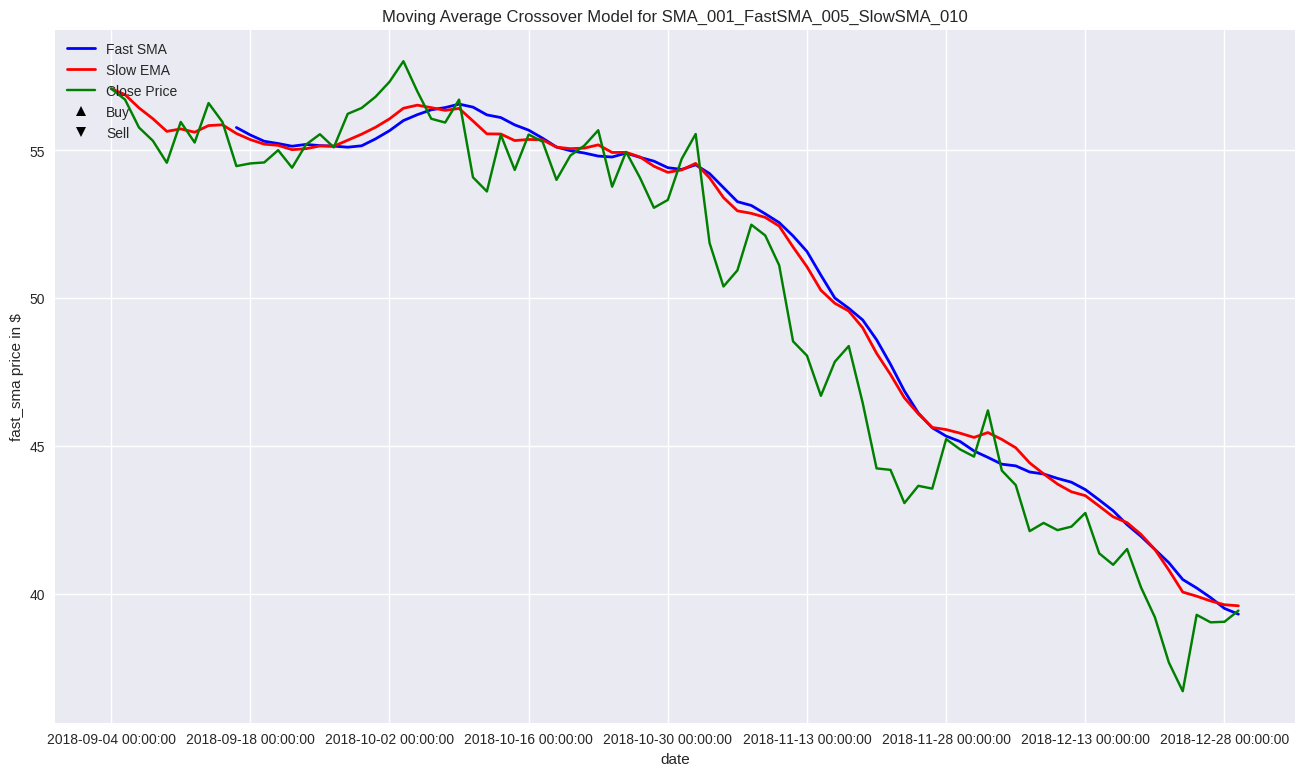

In [ ]:
# Display the details for the top model
if ema_performance_summary.iloc[0]['return_value'] > sma_performance_summary.iloc[0]['return_value']:
    top_model = ema_performance_summary.iloc[0]['model_name']
    best_return = ema_performance_summary.iloc[0]['return_value']
    display_signals_transactions(top_model, ema_portfolio_collection, ema_model_collection)
    print()
    draw_model_graphs(top_model, ema_model_collection[top_model], 'fast_ema', 'slow_ema')
else:
    top_model = sma_performance_summary.iloc[0]['model_name']
    best_return = sma_performance_summary.iloc[0]['return_value']
    display_signals_transactions(top_model, sma_portfolio_collection, sma_model_collection)
    print()
    draw_model_graphs(top_model, sma_model_collection[top_model], 'fast_sma', 'slow_sma')

## Task 5. Evaluate Performance

In [ ]:
print(f'The best model found is: {top_model}')
print(f'The best profit/loss for the investing period is: ${best_return:.2f}')
if initial_capital != 0:
    print(f'The best return percentage for initial capital is: {best_return / initial_capital * 100:.2f}%')

The best model found is: SMA_001_FastSMA_005_SlowSMA_010
The best profit/loss for the investing period is: $nan
The best return percentage for initial capital is: nan%


In [ ]:
# Calculate the stock's performance for a long-only model
model_template = model_template[model_start_date:model_end_date]
performance = model_template.iloc[-1]['close_price'] - model_template.iloc[0]['open_price']
print(f'The performance of the long-only model from day one is: ${performance:.2f}')

The performance of the long-only model from day one is: $-17.67


In [ ]:
print(f'Total time for the script: {datetime.now() - startTimeScript}')

Total time for the script: 0:20:22.729044
